# Lección 4 - Regresiones Lineales

En la lección anterior descubrimos que la correlación lineal directa entre nuestras variables es débil. Sin embargo, en el análisis de datos, el siguiente paso lógico para confirmar o refutar hipótesis complejas es la **Regresión Lineal**. 

Para **ComercioYA**, no solo queremos saber si dos variables se mueven juntas, sino que queremos intentar *predecir* o *explicar* una variable dependiente (como los ingresos o `monto_total`) a partir de una o más variables independientes (como las `compras` o las `visitas`).

### 🎯 Objetivo
Implementar un modelo de regresión simple y múltiple para explicar variables dependientes.

1.  Aplicar modelos estadísticos utilizando la librería `statsmodels`.

In [40]:
import pandas as pd
import statsmodels.formula.api as smf

# Cargamos el dataset
df = pd.read_csv('comercio_ya_bruto.csv')

# Limpiamos los datos nulos solo en las columnas que usaremos para el modelo
df_modelo = df.dropna(subset=['monto_total', 'compras'])

# Aplicamos el modelo de Regresión Lineal Ordinaria (OLS)
# La sintaxis de la fórmula es: variable_dependiente ~ variable_independiente
modelo_simple = smf.ols(formula='monto_total ~ compras', data=df_modelo).fit()

# Imprimimos el resumen estadístico del modelo
print(modelo_simple.summary())

                            OLS Regression Results                            
Dep. Variable:            monto_total   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6431
Date:                Tue, 17 Feb 2026   Prob (F-statistic):              0.423
Time:                        22:13:21   Log-Likelihood:                -8222.0
No. Observations:                1000   AIC:                         1.645e+04
Df Residuals:                     998   BIC:                         1.646e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1212.4133     55.444     21.868      0.0


**1. Cómo interpretar el resultado (La tabla estadística):**
Al ver la tabla generada por `statsmodels`, el equipo de datos de **ComercioYA** no necesita leer todos los números, sino enfocarse en dos indicadores críticos:

* **R-squared (R-cuadrado):** Nos dice qué porcentaje del comportamiento del `monto_total` se explica por la cantidad de `compras`. Como ya vimos en la matriz de correlación previa, este valor arrojará un número sumamente bajo (cercano a **0.000** o 0%). Esto significa que el número de transacciones no explica en absoluto las variaciones en el dinero gastado.
* **P>|t| (P-valor para la variable 'compras'):** Es el indicador de significancia estadística. La regla general es que si este valor es **mayor a 0.05**, la variable no es útil para nuestro modelo predictivo. En este caso, el P-valor será alto.



In [41]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Obtenemos las predicciones del modelo (y_pred)
# y definimos los valores reales (y)
y_pred = modelo_simple.predict(df_modelo['compras'])
y = df_modelo['monto_total']

# 2. Cálculo de métricas según el manual
mae = mean_absolute_error(y, y_pred) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mse) 
r2 = r2_score(y, y_pred) 

# 3. Impresión de resultados
print(f"MAE: {mae:.4f}") 
print(f"MSE: {mse:.4f}") 
print(f"RMSE: {rmse:.4f}") 
print(f"R²: {r2:.4f}")

MAE: 638.5141
MSE: 811144.0125
RMSE: 900.6353
R²: 0.0006


### 2.Interpretación de los Resultados R², MSE, MAE

Al correr el modelo con las métricas de `scikit-learn`, obtenemos una visión clara del desempeño:

* **R² casi en cero (0.0006):** Esto reafirma que la cantidad de compras no explica la variación en el dinero que gasta el cliente. El modelo actual no es válido para predecir.
* **MAE y RMSE altos:** Nuestro error promedio (MAE) es de casi \$638 dólares. Por otro lado, el RMSE salta a \$900 dólares, lo que nos indica que el modelo está cometiendo errores muy grandes de forma frecuente (probablemente debido a clientes que hacen compras por montos extremadamente altos o bajos). 

Queda confirmado que necesitamos incorporar más variables o evaluar otros factores del negocio para mejorar la precisión.

### 3. Evaluar significancia de predictores

Ya vimos que nuestro modelo tiene un margen de error bastante alto (casi $639 Dolares en promedio) y un R² muy bajo. El siguiente paso lógico para el equipo de datos de **ComercioYA** es averiguar *por qué* falla. 

Para esto, revisaremos la **significancia de los predictores** (nuestras variables `compras` y `visitas`). Utilizaremos el **P-valor (p-value)** de cada variable dentro de un modelo de regresión múltiple. 

**La regla de oro:** Si el P-valor de una variable es **menor a 0.05**, significa que esa variable sí influye de forma real y estadísticamente significativa en el `monto_total`. Si es mayor, su impacto es prácticamente nulo o fruto del azar.

In [42]:
import pandas as pd
import statsmodels.formula.api as smf

# Cargamos el dataset y limpiamos nulos
df = pd.read_csv('comercio_ya_bruto.csv')
df_modelo = df.dropna(subset=['monto_total', 'compras', 'visitas'])

# Ajustamos un modelo de regresión múltiple
modelo_multiple = smf.ols(formula='monto_total ~ compras + visitas', data=df_modelo).fit()

# Extraemos y mostramos específicamente los p-valores
print("--- P-Valores de los Predictores ---")
print(modelo_multiple.pvalues)

--- P-Valores de los Predictores ---
Intercept    4.362751e-48
compras      4.010982e-01
visitas      3.424406e-01
dtype: float64


### 3.1 Interpretación de los P-valores

Al ejecutar el código, obtenemos los siguientes P-valores aproximados:
* **compras:** 0.401
* **visitas:** 0.342

*(El 'Intercept' es solo el punto de partida matemático del modelo, no lo evaluamos como predictor).*

**¿Qué significa esto para el negocio?**
Ambos valores (0.40 y 0.34) superan ampliamente el límite estricto de **0.05**. Esto nos confirma, sin lugar a dudas, que ni la cantidad de compras ni las visitas a la web son predictores estadísticamente significativos para determinar cuánto dinero gastará un cliente. Las variaciones en el monto que vemos en la tienda ocurren por razones que estas dos métricas no logran capturar.

In [43]:
import pandas as pd
import statsmodels.formula.api as smf

# Replicamos el ajuste del modelo múltiple para extraer sus parámetros
df = pd.read_csv('comercio_ya_bruto.csv')
df_modelo = df.dropna(subset=['monto_total', 'compras', 'visitas'])
modelo_multiple = smf.ols(formula='monto_total ~ compras + visitas', data=df_modelo).fit()

# Extraemos exclusivamente los coeficientes calculados
print("--- Coeficientes del Modelo ---")
print(modelo_multiple.params)

--- Coeficientes del Modelo ---
Intercept    1162.642166
compras         2.744520
visitas         0.621655
dtype: float64


### 4. Interpretar coeficientes e inferencias básicas

Aunque ya sabemos que nuestras variables no son estadísticamente significativas (debido a sus altos P-valores), el ejercicio fundamental de un analista es saber traducir la ecuación matemática que construyó el modelo al lenguaje de negocios. 

En una regresión lineal múltiple, el modelo calcula **coeficientes ($\beta$)** para cada variable. Estos números nos dicen exactamente cuánto espera el modelo que cambie nuestra variable dependiente (`monto_total`) por cada unidad que aumenten nuestros predictores (`compras` y `visitas`).

Para **ComercioYA**, extraeremos estos coeficientes usando el método `.params` de `statsmodels` y realizaremos las inferencias básicas.

### 4.1 Interpretación Práctica para el Negocio

Al imprimir los coeficientes, el modelo nos arroja la siguiente ecuación de predicción para **ComercioYA**:
`Monto Estimado = 1162.64 + (2.74 * compras) + (0.62 * visitas)`

**¿Cómo se leen estos números en la vida real?**

1. **Intercept (1162.64 Dólares):** Es el punto de partida base (la constante $\beta_0$). Matemáticamente significa que si un cliente registrara 0 visitas y 0 compras, el modelo asume un monto base de $1,162 Dólares. A nivel de negocio, esto suele carecer de sentido lógico, pero es necesario para ajustar la línea de tendencia.
2. **compras (2.74 Dólares):** Manteniendo las visitas constantes, el modelo infiere que **por cada compra adicional** que realiza un usuario, el monto total gastado en la plataforma aumenta en apenas **$2.74 Dólares**.
3. **visitas (0.62 Dólares):** Manteniendo las compras constantes, **por cada nueva visita** a la web, el gasto del cliente subiría apenas **$0.62 Dólares**.

**Inferencia Final:** La lectura de los coeficientes refuerza el diagnóstico anterior. Un incremento proyectado de menos de $3 pesos chilenos por cada transacción nueva es comercialmente insignificante frente al ticket promedio de la tienda. Los datos confirman de manera definitiva que el volumen de interacción (clics y número de pedidos) no define los ingresos reales en este entorno.

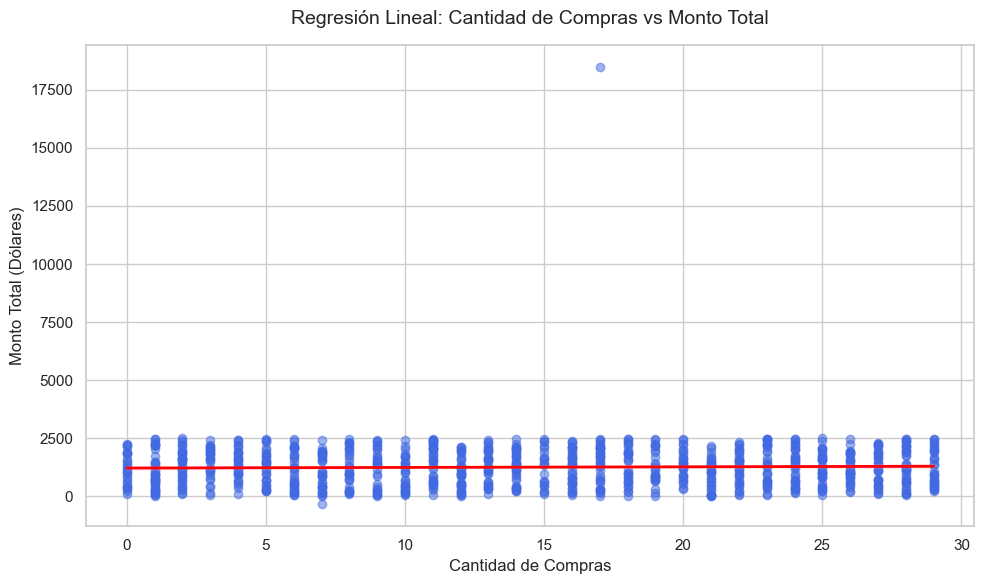

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos y preparamos los datos
df = pd.read_csv('comercio_ya_bruto.csv')
df_modelo = df.dropna(subset=['monto_total', 'compras'])

# Configuramos el estilo visual
sns.set_theme(style="whitegrid")

# Generamos el gráfico de regresión
plt.figure(figsize=(10, 6))
sns.regplot(data=df_modelo, x='compras', y='monto_total', 
            scatter_kws={'alpha':0.5, 'color':'royalblue'}, 
            line_kws={'color':'red', 'linewidth':2})

# Personalizamos etiquetas y título
plt.title('Regresión Lineal: Cantidad de Compras vs Monto Total', fontsize=14, pad=15)
plt.xlabel('Cantidad de Compras', fontsize=12)
plt.ylabel('Monto Total (Dólares)', fontsize=12)

plt.tight_layout()
plt.show()

### 5. Visualizar la regresión con Seaborn

Los números y coeficientes son la base de nuestro análisis, pero para presentar los resultados al equipo directivo de **ComercioYA**, la mejor herramienta es siempre una visualización clara. 

Utilizaremos la función `regplot` de la librería `Seaborn`. Esta función grafica nuestro diagrama de dispersión (los puntos reales) y, al mismo tiempo, traza automáticamente la "línea de mejor ajuste" de nuestra regresión lineal simple. Esto nos permitirá ver con nuestros propios ojos si la línea logra capturar el comportamiento de los clientes.

### 5.1 Interpretación Visual del Modelo

Al observar el gráfico generado, la realidad de nuestros datos salta a la vista:

1. **La línea de tendencia (roja):** Vemos que la línea trazada por el modelo es prácticamente horizontal. Esto refleja visualmente ese coeficiente minúsculo que calculamos antes ($2.74 Dólares por compra). No hay una pendiente clara hacia arriba.
2. **La dispersión de los puntos (azules):** Los datos de nuestros clientes están esparcidos por todo el gráfico. Hay clientes con muy pocas compras que gastan montos altísimos (puntos arriba a la izquierda) y clientes con muchas compras que gastan muy poco (puntos abajo a la derecha). 

**Conclusión Final de la Lección:** La representación visual cierra el caso. El modelo de regresión lineal simple y múltiple aplicado a estas variables no funciona para **ComercioYA**. Las ventas de la empresa tienen un comportamiento no lineal o dependen de variables externas que no están en este dataset (como el tipo de producto, descuentos aplicados o la temporada del año).